In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, cohen_kappa_score, recall_score, precision_score
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [44]:
# Ler o arquivo CSV com as colunas na primeira linha
data = pd.read_csv('../data/diabetes_prediction_weka.csv')

In [45]:
data = data.drop('gender', axis=1)
data = data.drop('smoking_history', axis=1)

In [46]:
# Separar as características (features) e a classe (label)
X = data.iloc[:, :-1].values  # Todas as colunas exceto a última
y = data.iloc[:, -1].values   # Última coluna

In [47]:
# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
# Construir o modelo Deep MLP
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

c:\Users\joao\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [51]:
# Treinar o modelo
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8883 - loss: 0.2373 - val_accuracy: 0.9170 - val_loss: 0.1661
Epoch 2/50
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9144 - loss: 0.1716 - val_accuracy: 0.9198 - val_loss: 0.1576
Epoch 3/50
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9188 - loss: 0.1617 - val_accuracy: 0.9213 - val_loss: 0.1568
Epoch 4/50
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9193 - loss: 0.1598 - val_accuracy: 0.9215 - val_loss: 0.1581
Epoch 5/50
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9211 - loss: 0.1580 - val_accuracy: 0.9226 - val_loss: 0.1530
Epoch 6/50
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9232 - loss: 0.1539 - val_accuracy: 0.9269 - val_loss: 0.1493
Epoch 7/50
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9241 - loss: 0.1517 - val_accuracy: 0.9292 - val_loss: 0.1439
Epoch 8/50
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9266 - loss: 0

In [52]:
# Fazer previsões
predictions = model.predict(X_test).round()

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [53]:
# Avaliação do modelo
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     18112
           1       0.96      0.91      0.94     15488

    accuracy                           0.94     33600
   macro avg       0.94      0.94      0.94     33600
weighted avg       0.94      0.94      0.94     33600

Accuracy: 0.9422916666666666


In [54]:
# Matriz de confusão e Índice Kappa
conf_matrix = confusion_matrix(y_test, predictions)
kappa_score = cohen_kappa_score(y_test, predictions)

In [55]:
print("Matriz de Confusão:")
print(conf_matrix)
print("Índice Kappa:", kappa_score)

Matriz de Confusão:
[[17494   618]
 [ 1321 14167]]
Índice Kappa: 0.8834920287935121


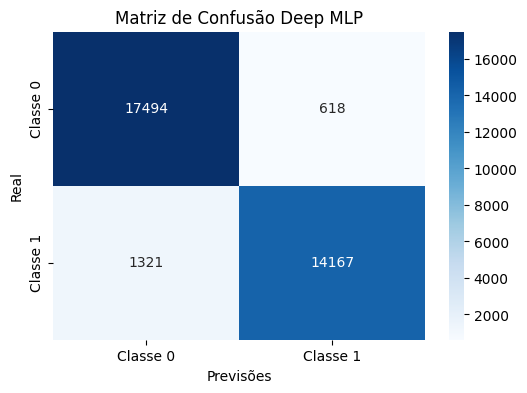

In [56]:
# Criar um plot da matriz de confusão usando seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Previsões')
plt.ylabel('Real')
plt.title('Matriz de Confusão Deep MLP')
plt.show()

Aplicando outras métricas

1 - Precisão

In [57]:
precision = precision_score (y_test , predictions)
print("Precisão:", precision)

Precisão: 0.9582008792695299


2 - Sensibilidade

In [58]:
sensitivity = recall_score(y_test, predictions)
print("Sensibilidade:", sensitivity)

Sensibilidade: 0.9147081611570248


3 - Especifidade

In [59]:
#true negatives
TN = conf_matrix[0][0]
#false positives
FP = conf_matrix[0][1]

specificity = TN/(TN+FP)
print("Especificidade:", specificity)

Especificidade: 0.9658789752650176
